# 1. Normal Sequence

In [1]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

In [2]:
max_features = 10000
maxlen = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features) # 시퀀스 데이터 로드

17464789/17464789 [==============================] - 2s 0us/step


In [3]:
# 패딩

x_train_norm = pad_sequences(x_train, maxlen=maxlen)
x_test_norm = pad_sequences(x_test, maxlen=maxlen)

In [4]:
# 모델 설계

model_norm = Sequential()
model_norm.add(Embedding(max_features, 32))
model_norm.add(LSTM(32))
model_norm.add(Dense(1, activation='sigmoid'))
model_norm.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_norm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# 학습

hist_norm = model_norm.fit(x_train_norm, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 23s 127ms/step - loss: 0.5920 - acc: 0.6707 - val_loss: 0.4946 - val_acc: 0.7802
Epoch 2/10
157/157 [==============================] - 15s 95ms/step - loss: 0.3561 - acc: 0.8540 - val_loss: 0.4692 - val_acc: 0.8364
Epoch 3/10
157/157 [==============================] - 11s 71ms/step - loss: 0.2750 - acc: 0.8910 - val_loss: 0.3442 - val_acc: 0.8618
Epoch 4/10
157/157 [==============================] - 10s 66ms/step - loss: 0.2308 - acc: 0.9129 - val_loss: 0.2827 - val_acc: 0.8860
Epoch 5/10
157/157 [==============================] - 8s 50ms/step - loss: 0.2059 - acc: 0.9227 - val_loss: 0.2933 - val_acc: 0.8816
Epoch 6/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1853 - acc: 0.9309 - val_loss: 0.4114 - val_acc: 0.8246
Epoch 7/10
157/157 [==============================] - 7s 44ms/step - loss: 0.1705 - acc: 0.9398 - val_loss: 0.3158 - val_acc: 0.8792
Epoch 8/10
157/157 [==============================] - 6s 37ms/st

# 2. Reversed Sequence

In [6]:
# 시퀀스 뒤집기
x_train_rev = [x[::-1] for x in x_train]
x_test_rev = [x[::-1] for x in x_test]

In [7]:
# 패딩
x_train_rev = pad_sequences(x_train, maxlen=maxlen)
x_test_rev = pad_sequences(x_test, maxlen=maxlen)

In [8]:
# 모델 설계

model_rev = Sequential()
model_rev.add(Embedding(max_features, 32))
model_rev.add(LSTM(32))
model_rev.add(Dense(1, activation='sigmoid'))
model_rev.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_rev.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
# 학습

hist_rev = model_rev.fit(x_train_rev, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 17s 93ms/step - loss: 0.5915 - acc: 0.6779 - val_loss: 0.4191 - val_acc: 0.8360
Epoch 2/10
157/157 [==============================] - 12s 74ms/step - loss: 0.3485 - acc: 0.8575 - val_loss: 0.3440 - val_acc: 0.8584
Epoch 3/10
157/157 [==============================] - 10s 65ms/step - loss: 0.2676 - acc: 0.8978 - val_loss: 0.2827 - val_acc: 0.8874
Epoch 4/10
157/157 [==============================] - 7s 42ms/step - loss: 0.2288 - acc: 0.9127 - val_loss: 0.3344 - val_acc: 0.8820
Epoch 5/10
157/157 [==============================] - 6s 40ms/step - loss: 0.1997 - acc: 0.9272 - val_loss: 0.3266 - val_acc: 0.8660
Epoch 6/10
157/157 [==============================] - 5s 32ms/step - loss: 0.1778 - acc: 0.9367 - val_loss: 0.3158 - val_acc: 0.8802
Epoch 7/10
157/157 [==============================] - 6s 37ms/step - loss: 0.1651 - acc: 0.9415 - val_loss: 0.3120 - val_acc: 0.8816
Epoch 8/10
157/157 [==============================] - 5s 33ms/step

# 3. Bidirectional LSTM

In [10]:
# 패딩

x_train_bid = pad_sequences(x_train, maxlen=maxlen)
x_test_bid = pad_sequences(x_test, maxlen=maxlen)

In [12]:
# 모델 설계

model_bid = Sequential()
model_bid.add(Embedding(max_features, 32))
model_bid.add(Bidirectional(LSTM(32)))
model_bid.add(Dense(1, activation='sigmoid'))
model_bid.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

model_bid.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 학습

hist_bid = model_bid.fit(x_train_bid, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 103ms/step - loss: 0.6337 - acc: 0.6237 - val_loss: 0.5117 - val_acc: 0.7424
Epoch 2/10
157/157 [==============================] - 13s 83ms/step - loss: 0.4048 - acc: 0.8330 - val_loss: 0.3438 - val_acc: 0.8588
Epoch 3/10
157/157 [==============================] - 11s 67ms/step - loss: 0.2978 - acc: 0.8834 - val_loss: 0.4527 - val_acc: 0.8386
Epoch 4/10
157/157 [==============================] - 10s 62ms/step - loss: 0.2519 - acc: 0.9042 - val_loss: 0.3120 - val_acc: 0.8672
Epoch 5/10
157/157 [==============================] - 9s 57ms/step - loss: 0.2214 - acc: 0.9183 - val_loss: 0.3851 - val_acc: 0.8456
Epoch 6/10
157/157 [==============================] - 9s 55ms/step - loss: 0.1914 - acc: 0.9301 - val_loss: 0.2997 - val_acc: 0.8774
Epoch 7/10
157/157 [==============================] - 7s 47ms/step - loss: 0.1745 - acc: 0.9374 - val_loss: 0.3459 - val_acc: 0.8812
Epoch 8/10
157/157 [==============================] - 6s 41ms/st

# 4. 그래프

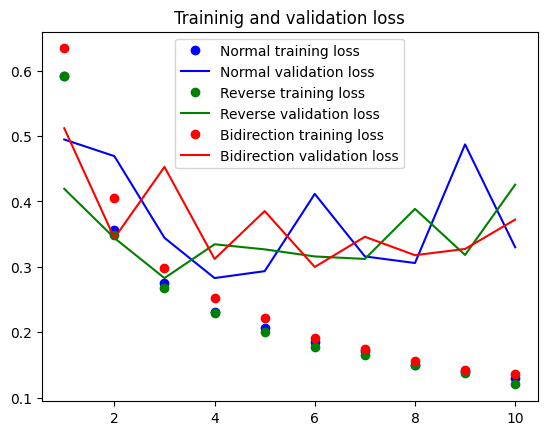

In [16]:
import matplotlib.pyplot as plt


epochs = range(1, 11)

history_norm = hist_norm.history
loss_norm = history_norm['loss']
val_loss_norm = history_norm['val_loss']


history_rev = hist_rev.history
loss_rev = history_rev['loss']
val_loss_rev = history_rev['val_loss']


history_bid = hist_bid.history
loss_bid = history_bid['loss']
val_loss_bid = history_bid['val_loss']


plt.plot(epochs, loss_norm, 'bo', label='Normal training loss')
plt.plot(epochs, val_loss_norm, 'b', label='Normal validation loss')
plt.plot(epochs, loss_rev, 'go', label='Reverse training loss')
plt.plot(epochs, val_loss_rev, 'g', label='Reverse validation loss')
plt.plot(epochs, loss_bid, 'ro', label='Bidirection training loss')
plt.plot(epochs, val_loss_bid, 'r', label='Bidirection validation loss')
plt.title('Traininig and validation loss')
plt.legend()
plt.show()

# 5. 성능

In [17]:
import numpy as np

performance_norm = model_norm.evaluate(x_test_norm, y_test)
performance_rev = model_rev.evaluate(x_test_rev, y_test)
performance_bid = model_bid.evaluate(x_test_bid, y_test)

print(f"LSTM with normal sequence: {np.round(performance_norm[1], 3)}")
print(f"LSTM with reversed sequence: {np.round(performance_rev[1], 3)}")
print(f"Bidirectional LSTM with normal sequence: {np.round(performance_bid[1], 3)}")

782/782 [==============================] - 11s 15ms/step - loss: 0.4280 - acc: 0.8665
LSTM with normal sequence: 0.855
LSTM with reversed sequence: 0.835
Bidirectional LSTM with normal sequence: 0.867


- 양방향 LSTM을 사용했을 때 일반적인 LSTM, 시퀀스를 뒤집어 학습한 LSTM 모델보다 정확도가 조금 더 높다.

- 하지만 양방향 LSTM 모델이 타 모델보다 조금 더 일찍 과대적합 되는 경향 -> 양방향 순환층이 단방향 LSTM보다 모델 파라미터가 2배(정방향, 역방향) 많기 때문

- 규제와 함께 양방향 순환 층을 사용하는 것이 단방향 순환 층을 사용하는 것보다 더 효과적일 것